In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()
import anndata as ad
print(ad.__version__)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.6.1
scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
AO =ad.read_csv(path + 'AO_leukemia_simulations_annot_100cells2.csv', delimiter= None, first_column_names=None, dtype='float32')

In [3]:
AO.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 10000 × 81 >

In [4]:
mito_genes = [name for name in AO.var_names if name.startswith('MT-')]
AO.obs['percent_mito']=np.sum( AO[:, mito_genes].X, axis=1)/ np.sum(AO.X, axis=1)
AO.obs['n_counts']= AO.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


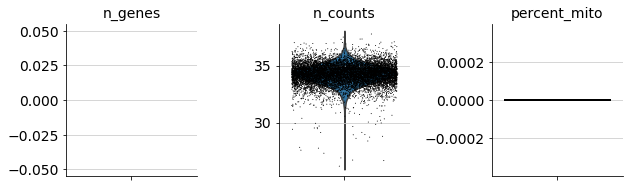

In [5]:
sc.pl.violin(AO, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [6]:
sc.pp.normalize_per_cell(AO, counts_per_cell_after=20000)

In [7]:
AO.raw = sc.pp.log1p(AO, copy=True)

In [8]:
sc.tl.pca(AO)

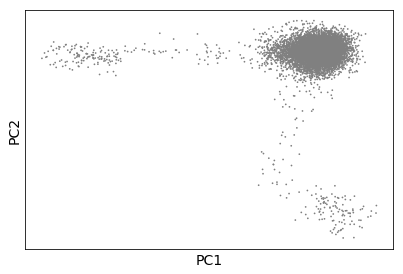

In [9]:
AO.obsm['X_pca'] *=-1
sc.pl.pca_scatter(AO)

In [10]:
sc.tl.tsne(AO, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:33.87) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [11]:
import MulticoreTSNE

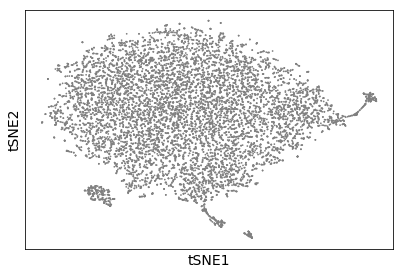

In [12]:
sc.pl.tsne(AO)

In [13]:
from sklearn.cluster import KMeans
import numpy as np

In [14]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(AO.X)

In [15]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [16]:
print(kmeans.labels_)

[0 0 0 ... 0 0 1]


In [17]:
df = pd.DataFrame(kmeans.labels_)
df.columns=['KMean']
df

,KMean
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
icantbelievethatworked = pd.merge(AO.obs, AO.obs)

In [19]:
AOKMean = pd.concat([icantbelievethatworked, df], axis=1, join='inner')

In [20]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/AO/'
Sim =ad.read_csv(path + 'srep24307-s3.csv', delimiter= '\t', first_column_names=True)
Sim = Sim.T

In [21]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [22]:
print(Sim)

AnnData object with n_obs × n_vars = 18 × 81 


In [23]:
Sim.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 18 × 81 >

In [24]:
mito_genes = [name for name in Sim.var_names if name.startswith('MT-')]
Sim.obs['percent_mito']=np.sum( Sim[:, mito_genes].X, axis=1)/ np.sum(Sim.X, axis=1)
Sim.obs['n_counts']= Sim.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


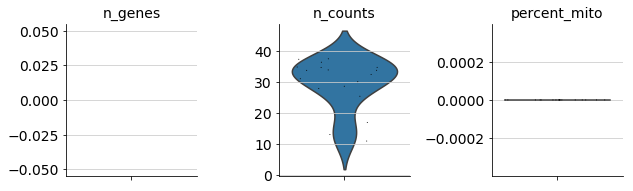

In [25]:
sc.pl.violin(Sim, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

In [26]:
sc.pp.normalize_per_cell(Sim, counts_per_cell_after=20000)

In [27]:
Sim.raw = sc.pp.log1p(Sim, copy=True)

In [28]:
sc.tl.pca(Sim)

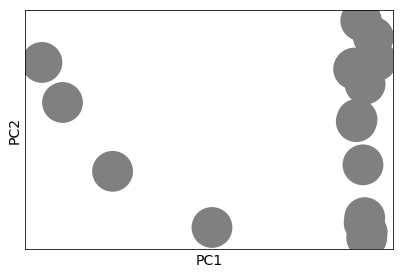

In [29]:
Sim.obsm['X_pca'] *=-1
sc.pl.pca_scatter(Sim)

In [30]:
sc.tl.tsne(Sim, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:00.02) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [31]:
import MulticoreTSNE

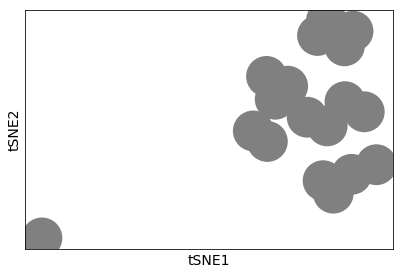

In [32]:
sc.pl.tsne(Sim)

In [33]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(Sim.X)

In [34]:
kmeans.labels_

array([0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 0, 5, 1, 2, 1, 3, 3, 0], dtype=int32)

In [35]:
print(kmeans.labels_)

[0 0 4 4 0 0 3 3 4 0 0 5 1 2 1 3 3 0]


In [36]:
df = pd.DataFrame(kmeans.labels_)
df.columns=['KMean']
df

,KMean
0,0
1,0
2,4
3,4
4,0
5,0
6,3
7,3
8,4
9,0


In [37]:
icantbelievethatworked = pd.merge(Sim.obs, Sim.obs)

In [38]:
SimKMean = pd.concat([icantbelievethatworked, df], axis=1, join='inner')

In [39]:
AOKMean

,percent_mito,n_counts,KMean
0,0.0,34.740082,0
1,0.0,34.740082,0
2,0.0,34.740082,0
3,0.0,34.740082,0
4,0.0,34.740082,0
5,0.0,34.740082,0
6,0.0,34.740082,0
7,0.0,34.740082,0
8,0.0,34.740082,0
9,0.0,34.740082,0


In [40]:
AOCluster1 = AOKMean.loc[AOKMean['KMean'] == 0]

In [41]:
AOCluster1['index1'] = AOCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
AOCluster1 = AOCluster1['index1'].tolist()

In [43]:
AOCluster1 = AO[AOCluster1, :]

In [44]:
AOCluster2 = AOKMean.loc[AOKMean['KMean'] == 1]

In [45]:
AOCluster2['index2'] = AOCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
AOCluster2 = AOCluster2['index2'].tolist()

In [47]:
AOCluster2 = AO[AOCluster2, :]

In [48]:
AOCluster3 = AOKMean.loc[AOKMean['KMean'] == 2]

In [49]:
AOCluster3['index3'] = AOCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
AOCluster3 = AOCluster3['index3'].tolist()

In [51]:
AOCluster3 = AO[AOCluster3, :]

In [52]:
AOCluster4 = AOKMean.loc[AOKMean['KMean'] == 3]

In [53]:
AOCluster4['index4'] = AOCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
AOCluster4 = AOCluster4['index4'].tolist()

In [55]:
AOCluster4 = AO[AOCluster4, :]

In [56]:
AOCluster5 = AOKMean.loc[AOKMean['KMean'] == 4]

In [57]:
AOCluster5['index5'] = AOCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
AOCluster5 = AOCluster5['index5'].tolist()

In [59]:
AOCluster5 = AO[AOCluster5, :]

In [60]:
AOCluster6 = AOKMean.loc[AOKMean['KMean'] == 5]

In [61]:
AOCluster6['index6'] = AOCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
AOCluster6 = AOCluster6['index6'].tolist()

In [63]:
AOCluster6 = AO[AOCluster6, :]

In [64]:
SimCluster1 = SimKMean.loc[SimKMean['KMean'] == 0]

In [65]:
SimCluster1['index7'] = SimCluster1.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
SimCluster1 = SimCluster1['index7'].tolist()

In [67]:
SimCluster1 = Sim[SimCluster1, :]

In [68]:
SimCluster2 = SimKMean.loc[SimKMean['KMean'] == 1]

In [69]:
SimCluster2['index8'] = SimCluster2.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
SimCluster2 = SimCluster2['index8'].tolist()

In [71]:
SimCluster2 = Sim[SimCluster2, :]

In [72]:
SimCluster3 = SimKMean.loc[SimKMean['KMean'] == 2]

In [73]:
SimCluster3['index9'] = SimCluster3.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
SimCluster3 = SimCluster3['index9'].tolist()

In [75]:
SimCluster3 = Sim[SimCluster3, :]

In [76]:
SimCluster4 = SimKMean.loc[SimKMean['KMean'] == 3]

In [77]:
SimCluster4['index10'] = SimCluster4.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
SimCluster4 = SimCluster4['index10'].tolist()

In [79]:
SimCluster4 = Sim[SimCluster4, :]

In [80]:
SimCluster5 = SimKMean.loc[SimKMean['KMean'] == 4]

In [81]:
SimCluster5['index11'] = SimCluster5.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
SimCluster5 = SimCluster5['index11'].tolist()

In [83]:
SimCluster5 = Sim[SimCluster5, :]

In [84]:
SimCluster6 = SimKMean.loc[SimKMean['KMean'] == 5]

In [85]:
SimCluster6['index12'] = SimCluster6.index

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
SimCluster6 = SimCluster6['index12'].tolist()

In [87]:
SimCluster6 = Sim[SimCluster6, :]

In [88]:
AOCluster1 = AOCluster1.X.mean(axis=1)

In [89]:
AOCluster2 = AOCluster2.X.mean(axis=1)

In [90]:
AOCluster3 = AOCluster3.X.mean(axis=1)
AOCluster3

ArrayView([246.9136 , 246.91356, 246.91356, 246.91357, 246.91357,
           246.9136 , 246.91364, 246.91357, 246.91356, 246.91353,
           246.91356, 246.91357, 246.91357, 246.91356, 246.91357,
           246.91357, 246.9136 , 246.91357, 246.91357, 246.91357,
           246.91357, 246.91357, 246.91357, 246.91357, 246.91356,
           246.91356, 246.91357, 246.91356, 246.91357, 246.91356,
           246.91356, 246.91356, 246.91357, 246.91357, 246.91357,
           246.9136 , 246.91357, 246.91357, 246.9136 , 246.91356,
           246.91357, 246.91356, 246.91353, 246.91357, 246.91357,
           246.91356, 246.9136 , 246.91353, 246.91356, 246.91356,
           246.91356, 246.91356, 246.91364, 246.91357, 246.91356,
           246.9136 , 246.91356, 246.91357, 246.91356, 246.91357,
           246.91356, 246.91357, 246.91357, 246.91357, 246.91356,
           246.91356, 246.9136 , 246.91356, 246.91357, 246.91356,
           246.9136 , 246.9136 , 246.91357, 246.9136 , 246.91356,
          

In [91]:
AOCluster4 = AOCluster4.X.mean(axis=1)

In [92]:
AOCluster5 = AOCluster5.X.mean(axis=1)

In [93]:
AOCluster6 = AOCluster6.X.mean(axis=1)

In [94]:
SimCluster1 = SimCluster1.X.mean()

In [95]:
SimCluster2 = SimCluster2.X.mean()

In [96]:
SimCluster3 = SimCluster3.X.mean()

In [97]:
SimCluster4 = SimCluster4.X.mean()

In [98]:
SimCluster5 = SimCluster5.X.mean()

In [99]:
SimCluster6 = SimCluster6.X.mean()

In [100]:
from scipy.spatial import distance

In [101]:
dist11 = distance.euclidean(AOCluster1, SimCluster1)

In [102]:
dist12 =  distance.euclidean(AOCluster1, SimCluster2)

In [103]:
dist13 =  distance.euclidean(AOCluster1, SimCluster3)

In [104]:
dist14 =  distance.euclidean(AOCluster1, SimCluster4)

In [105]:
dist15 = distance.euclidean(AOCluster1, SimCluster5)

In [106]:
dist16 =  distance.euclidean(AOCluster1, SimCluster6)

In [107]:
dist21 = distance.euclidean(AOCluster2, SimCluster1)

In [108]:
dist22 =  distance.euclidean(AOCluster2, SimCluster2)

In [109]:
dist23 =  distance.euclidean(AOCluster2, SimCluster3)

In [110]:
dist24 =  distance.euclidean(AOCluster2, SimCluster4)

In [111]:
dist25 = distance.euclidean(AOCluster2, SimCluster5)

In [112]:
dist26 =  distance.euclidean(AOCluster2, SimCluster6)

In [113]:
dist31 = distance.euclidean(AOCluster3, SimCluster1)

In [114]:
dist32 =  distance.euclidean(AOCluster3, SimCluster2)

In [115]:
dist33 =  distance.euclidean(AOCluster3, SimCluster3)

In [116]:
dist34 =  distance.euclidean(AOCluster3, SimCluster4)

In [117]:
dist35 = distance.euclidean(AOCluster3, SimCluster5)

In [118]:
dist36 =  distance.euclidean(AOCluster3, SimCluster6)

In [119]:
dist41 = distance.euclidean(AOCluster4, SimCluster1)

In [120]:
dist42 =  distance.euclidean(AOCluster4, SimCluster2)

In [121]:
dist43 =  distance.euclidean(AOCluster4, SimCluster3)

In [122]:
dist44 =  distance.euclidean(AOCluster4, SimCluster4)

In [123]:
dist45 = distance.euclidean(AOCluster4, SimCluster5)

In [124]:
dist46 =  distance.euclidean(AOCluster4, SimCluster6)

In [125]:
dist51 = distance.euclidean(AOCluster5, SimCluster1)

In [126]:
dist52 =  distance.euclidean(AOCluster5, SimCluster2)

In [127]:
dist53 =  distance.euclidean(AOCluster5, SimCluster3)

In [128]:
dist54 =  distance.euclidean(AOCluster5, SimCluster4)

In [129]:
dist55 = distance.euclidean(AOCluster5, SimCluster5)

In [130]:
dist56 =  distance.euclidean(AOCluster5, SimCluster6)

In [131]:
dist61 = distance.euclidean(AOCluster6, SimCluster1)

In [132]:
dist62 =  distance.euclidean(AOCluster6, SimCluster2)

In [133]:
dist63 =  distance.euclidean(AOCluster6, SimCluster3)

In [134]:
dist64 =  distance.euclidean(AOCluster6, SimCluster4)

In [135]:
dist65 = distance.euclidean(AOCluster6, SimCluster5)

In [136]:
dist66 =  distance.euclidean(AOCluster6, SimCluster6)

In [137]:
[dist11, dist12, dist13, dist14, dist15, dist16]

[0.00468519376590848,
 0.0021492154337465763,
 0.0015880140708759427,
 0.0021492154337465763,
 0.0017906174762174487,
 0.00468519376590848]

In [138]:
[dist21, dist22, dist23, dist24, dist25, dist26]

[0.0035304895136505365,
 0.0016154871555045247,
 0.0011785870883613825,
 0.0016154871555045247,
 0.0013282160507515073,
 0.0035304895136505365]

In [139]:
[dist31, dist32, dist33, dist34, dist35, dist36]

[0.0006885079201310873,
 0.00026029543369077146,
 0.00020471813331823796,
 0.00026029543369077146,
 0.00026384912780486047,
 0.0006885079201310873]

In [140]:
[dist41, dist42, dist43, dist44, dist45, dist46]

[0.0007470576092600822,
 0.00037126237293705344,
 0.0002750817220658064,
 0.00037126237293705344,
 0.00029430087306536734,
 0.0007470576092600822]

In [141]:
[dist51, dist52, dist53, dist54, dist55, dist56]

[0.0003759364190045744,
 0.00013817421859130263,
 9.529110684525222e-05,
 0.00013817421859130263,
 0.00012766418512910604,
 0.0003759364190045744]

In [142]:
[dist61, dist62, dist63, dist64, dist65, dist66]

[0.001051860861480236,
 0.00045827202848158777,
 0.0003452669770922512,
 0.00045827202848158777,
 0.0004042859363835305,
 0.001051860861480236]